In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import copy

In [2]:
nakr = 97.6
shirota = 38.8485775
nachUgl = 0
dolgota = 90-nakr
prvgrd = 180/math.pi
nabprvgrd = math.pi/180

In [3]:
fi_list = list()
li_list = list()
Dli_list = list()

In [4]:
for i in range(360):
    fi = prvgrd*math.asin(math.sin(shirota*nabprvgrd)*math.cos(i*nabprvgrd)+math.cos(shirota*nabprvgrd)*math.sin(i*nabprvgrd)*math.cos(dolgota*nabprvgrd))
    fi_list.append(fi)
    sinALPHi = (math.sin(dolgota*nabprvgrd)*math.sin(i*nabprvgrd))/math.cos(fi*nabprvgrd)
    cosALPHi = (math.cos(i*nabprvgrd)-math.sin(shirota*nabprvgrd)*math.sin(fi*nabprvgrd))/(math.cos(shirota*nabprvgrd)*math.cos(fi*nabprvgrd))
    
    if sinALPHi < 0:
       Dli = math.acos(cosALPHi)*prvgrd
    else: 
       Dli = 360 - math.acos(cosALPHi)*prvgrd
    
    Dli_list.append(Dli)
    li=nachUgl+Dli
    li_list.append(li)
    

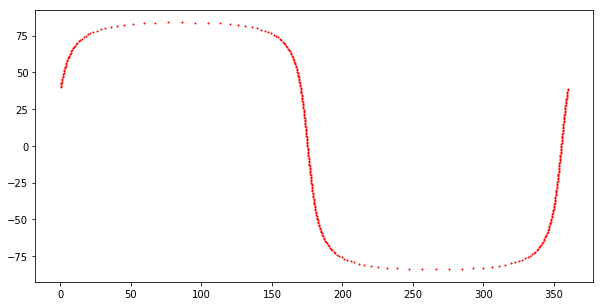

In [6]:
fig = plt.figure(figsize=(10,5))
plt.scatter( Dli_list, fi_list, color = 'red', s = 1)

In [54]:
cities_table = pd.read_excel('cities.xlsx')
cities_table

,City,Latitude,Longitude,Distance
0,Пекин,39.90,116.38,0.1
1,Токио,35.68,139.69,0.1
2,Москва,55.74,37.61,0.1
3,Дели,28.61,77.23,0.1
4,Сеул,37.56,126.97,0.1
5,Джакарта,-6.20,106.82,0.1
6,Бангкок,13.75,100.49,0.1
7,Мехико,19.42,259.15,0.1
8,Каир,30.04,31.24,0.1
9,Лима,-12.03,282.99,0.1


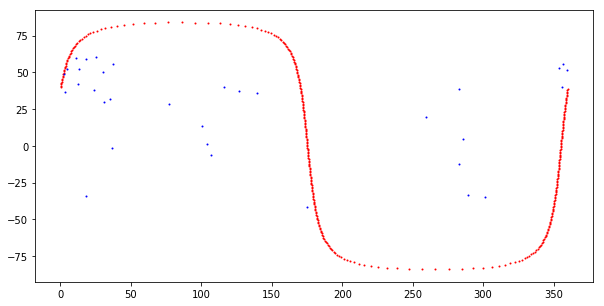

In [55]:
fig = plt.figure(figsize=(10,5))
plt.scatter( Dli_list, fi_list, color = 'red', s = 1)
plt.scatter( cities_table['Longitude'].values, cities_table['Latitude'].values, color = 'blue', s = 1)

In [56]:
def count_distance(x1, x2, y1, y2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2)

In [57]:
for i in range(len(cities_table)):
    dist_min = 10000000000000
    for j in range(len(Dli_list)):
        dist = count_distance(cities_table['Longitude'][i], Dli_list[j], cities_table['Latitude'][i], fi_list[j])
        if dist < dist_min:
            dist_min = dist
    cities_table['Distance'][i] = dist_min

C:\Users\user\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [58]:
cities_table.sort_values(by='Distance')

,City,Latitude,Longitude,Distance
22,Париж,48.85,2.30,0.321618
26,Амстердам,52.37,4.88,1.881713
17,Мадрид,40.41,356.30,4.015973
23,Алжир,36.78,3.06,4.207225
29,Осло,59.91,10.73,4.788282
32,Велингтон,-41.28,174.77,5.590949
15,Берлин,52.52,13.40,9.973156
25,Стокгольм,59.32,18.05,11.500706
21,Рим,41.88,12.50,11.743124
10,Лондон,51.50,359.87,12.652090


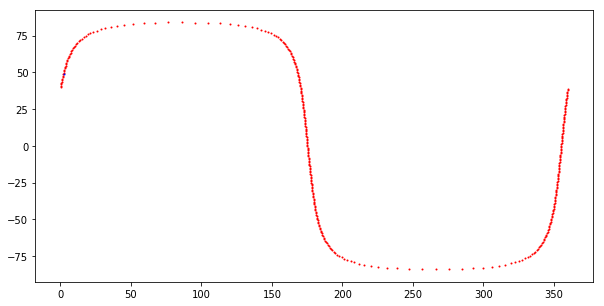

In [49]:
fig = plt.figure(figsize=(10,5))
plt.scatter( Dli_list, fi_list, color = 'red', s = 1)
plt.scatter( cities_table['Longitude'][22], cities_table['Latitude'][22], color = 'blue', s = 1)

In [62]:
# известно, что 1 градус равен 111 км, а значит, необходимая ширина полосы захвата равна:
swath = 0.321618 * 111 * 2
math.ceil(swath)

72.0